Midterm Project

Importing libraries

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random

Function for output points of target function

In [18]:
def my_output(newX):
    k = -5.7
    b = 3.2
    out = []
    for i in range(newX.shape[0]):
        if newX[i,:1]*k + b - newX[i, 1:] > 0:
            out.append(1)
        else:
            out.append(-1)
    return out

Linear Regression Implementation

In [19]:
def LinearReg(input, output):
    input = np.insert(input, 0, 1, axis=1)
    x = np.linalg.inv(np.transpose(input).dot(input))
    xPseudo = x.dot(np.transpose(input))
    w = xPseudo.dot(output)
    return w

Generating X and y of size 1000 as directed by Ex 3.2

In [20]:
input = np.random.rand(1000, 2)
output = my_output(input)
output = np.transpose(output)
randomOut = np.random.randint(1000, size = 100)
for i in range(randomOut.shape[0]):
    if output[randomOut[i]] == 1:
        output[randomOut[i]] = -1
    else:
        output[randomOut[i]] = 1


Generating X and y of size 100 as directed by Ex 3.2

In [21]:
input = np.random.rand(100, 2)
output = my_output(input)
output = np.transpose(output)
randomOut = np.random.randint(100, size = 10)
for i in range(randomOut.shape[0]):
    if output[randomOut[i]] == 1:
        output[randomOut[i]] = -1
    else:
        output[randomOut[i]] = 1


Implementation of Pocket Algorithm

In [22]:
class PerceptronForPocket:
        
    def predict(self, x):
        if np.dot(self.w[1:], x) + self.w[0] < 0:
            return 0
        else:
            return 1
    def predictW(self,inp, ww):
        if np.dot(ww[1:], inp) + ww[0] < 0:
            return 0
        else:
            return 1         
    def fit(self, X, y):
        d  = X.shape[1]
        self.w = np.zeros(d + 1)
        self.ww = self.w;
        
        i = 0
        error_count = 1
        while error_count > 0:
            i += 1
            if i > 1000:
                break
                error_count = 0
            
            for j in range(X.shape[0]):
                ypred = self.predict(X[j])
                ytrue = y[j]

                if ypred == 0:
                    ypred = -1
                if ytrue == 0:
                    ytrue = -1

                if ypred != ytrue:

                    error_count += 1
                    
                    self.w[1:] += ytrue * X[j]
                    self.w[0] += ytrue
                    self.ww = np.c_[self.ww, self.w]
        return np.transpose(self.ww)
    
    def pocket(self,inp, out):
        ww = self.fit(inp, out)
        wW = ww[0]
        error = 0
        Ein1 = []
        Ein2 = []
        for q in range(inp.shape[0]):
            ypred = self.predictW(inp[q], wW)
            ytrue = out[q]

            if ypred == 0:
                ypred = -1
            if ytrue == 0:
                ytrue = -1

            if ypred != ytrue:
                error += 1
        error_initial = error
        if ww.shape[0] < 1000:
            size = ww.shape[0]
        else:
            size = 1000
        for j in range(size):
            error = 0
            for k in range(inp.shape[0]):
                ypred = self.predictW(inp[k], ww[j])
                ytrue = out[k]

                if ypred == 0:
                    ypred = -1
                if ytrue == 0:
                    ytrue = -1

                if ypred != ytrue:
                    error += 1
            if error < error_initial:
                wW = ww[j]
                error_initial = error
            Ein1.append(error)
            Ein2.append(error_initial)
        return (wW)

Plotting using Pocket algorithm (yellow line) and
using Linear Regression(green line)

Text(0,0.5,'x2')

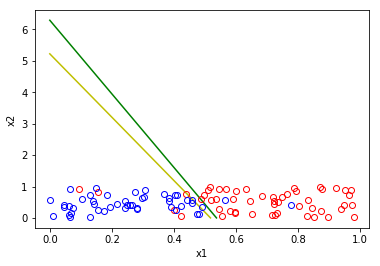

In [23]:
w = LinearReg(input, output)
p = PerceptronForPocket()
wPocket = p.pocket(input, output)
yPocket = np.linspace(-wPocket[0]/wPocket[2], 0, 3)
xPocket = np.linspace(0, -wPocket[0]/wPocket[1],3)
plt.plot(xPocket,yPocket, 'g')

yRegression = np.linspace(-w[0]/w[2], 0, 3)
xRegression = np.linspace(0, -w[0]/w[1],3)
plt.plot(xRegression,yRegression, 'y')

c0 = output == -1
c1 = output == 1

plt.plot(input[:,0][c0], input[:,1][c0], 'o', mec='r', mfc='none')
plt.plot(input[:,0][c1], input[:,1][c1], 'o', mec='b', mfc='none')
plt.xlabel('x1')
plt.ylabel('x2')

Function for identifying Etest (number of errors)

In [24]:
def Etest(input, output, w):
    error = 0
    lineSigns = np.sign(np.dot(input, w[1:]) + w[0])
    for i in range(input.shape[0]):
        if  lineSigns[i] != output[i]:
            error+=1
    return error

Printing number of errors made by each algorithm

In [25]:
ERegression = Etest(input, output, w)
EPocket = Etest(input, output, wPocket)
print("Number of errors made by pocket algorithm:",
      EPocket)
print("Number of errors made by linear regression algorithm:", 
      ERegression)


Number of errors made by pocket algorithm: 7
Number of errors made by linear regression algorithm: 8


Reapeating the experiment 100 times

In [28]:
wRegArray = []
wPocketArray = []
p = PerceptronForPocket()
for i in range(100):
    input = np.random.rand(100, 2)
    output = my_output(input)
    output = np.transpose(output)
    randomOut = np.random.randint(100, size = 10)
    for j in range(randomOut.shape[0]):
        if output[randomOut[j]] == 1:
            output[randomOut[j]] = -1
        else:
            output[randomOut[j]] = 1
    wRegArray.append(LinearReg(input, output))
    wPocketArray.append(p.pocket(input, output))

Generating Errors arays

In [29]:
ERegArray = []
EPocketArray = []
for i in range(100):
    ERegArray.append(Etest(input, output, wRegArray[i]))
    EPocketArray.append(Etest(input, output, wPocketArray[i]))

Plot of Eregression(red) and Epocket()

Text(0,0.5,'E')

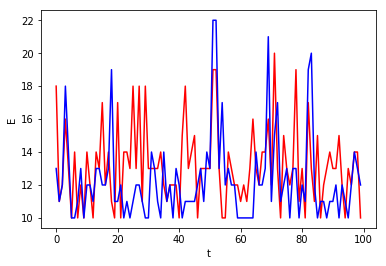

In [30]:
t = np.arange(0,100)
plt.plot(t, ERegArray, 'r')
plt.plot(t, EPocketArray, 'b')
plt.xlabel('t')
plt.ylabel('E')

In [31]:
ERegMean = np.mean(ERegArray)
EPocketMean = np.mean(EPocketArray)
print('Mean of Eregression is:', ERegMean)
print('Mean of Epocket is:', EPocketMean)

Mean of Eregression is: 13.17
Mean of Epocket is: 12.31


According to the graph and the mean values of errors, it can be concluded that the pocket algorithm is little bit better in this classification problem, however, linear regression algorithm is much faster and not much worse than pocket algorithm.

Task 2

Logistic regression implementation

In [32]:
import seaborn as sns
from sklearn import datasets
from sklearn.cross_validation import train_test_split

In [33]:
iris = datasets.load_iris()
x_iris = iris.data[:-50,:]
y_iris = iris.target[:-50]

In [34]:
for i in range(y_iris.shape[0]):
    if(y_iris[i] == 0):
        y_iris[i] = -1;

Logistic regression algorithm implementation

In [35]:
def Logistic(input, output, nu, T):
    input = np.insert(input, 0, 1, axis=1)
    w = np.zeros(shape = (T, input.shape[1]))
    gt = np.zeros(shape = (T, input.shape[0]))
    for t in range(1, T):
        n = np.random.randint(1, input.shape[0])
        w[t] = w[t-1] + nu*(2*output[n]*input[n])/(1+np.exp(output[n]*(2*np.transpose(w[t-1])*input[n])))
        for j in range(input.shape[0]):
            gt[t][j] = np.sign(np.dot(w[t], input[j]))
    return gt

Generating gt array

In [36]:
gt = Logistic(x_iris, y_iris, 0.001, 2000)

Dividing data into testing (20%) and training (80%)

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, test_size=0.2, random_state=1)

In [38]:
Xtrain.shape

(80, 4)

In [39]:
gt1 = Logistic(Xtrain, ytrain, 0.001, 2000)
gt2 = Logistic(Xtest, ytest, 0.001, 2000)

Function for defining errors

In [40]:
def Et(gt, output):
    errors = []
    for i in range(1, gt.shape[0]):
        error = 0
        for j in range(gt.shape[1]):
            if(gt[i][j] !=output[j]):
                error+=1
        errors.append(error);
    return errors

In [41]:
err1 = Et(gt1, ytrain)
err2 = Et(gt2, ytest)

In [42]:
len(err1)

1999

In [43]:
np.shape(err1)

(1999,)

In [44]:
t = np.arange(1, 2000);

Text(0,0.5,'E')

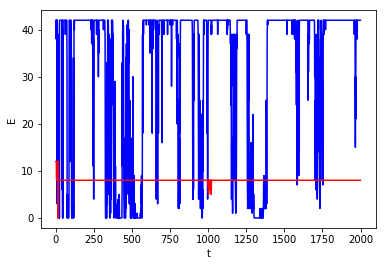

In [45]:
plt.plot(t, err1, 'b')
plt.plot(t, err2, 'r')
plt.xlabel('t')
plt.ylabel('E')

Task 3

SVM for digiits

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

Linear SVM model for digit recognition

In [47]:
digits = datasets.load_digits()
x = digits.data
y = digits.target
model = SVC()
tuned_param = [{'kernel': ['linear'], 'C': [1,10,100,1000]}]
clf = GridSearchCV(model, tuned_param, cv=10)
clf.fit(x, y)
print(clf.best_score_)
print(clf.best_params_)

0.9610461880912632
{'C': 1, 'kernel': 'linear'}


Choosing the best model and plotting training(red curve) vs valifdation curve(blue curve) for Linear SVM

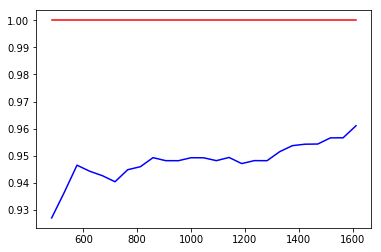

In [48]:
best = clf.best_estimator_
train_sizes, train_score, valid_scores = learning_curve(best, x, y, train_sizes=np.linspace(0.3, 1, 25), cv=10)
plt.plot(train_sizes, np.mean(train_score, 1), 'r')
plt.plot(train_sizes, np.mean(valid_scores, 1), 'b')

Polynomial SVM model for digit recognition

In [684]:
model = SVC()
params = [{'kernel': ['poly'], 'degree': [3,4,5,6,7], 'C': [1,10,100,1000], 'gamma': [0.01, 0.001, 0.0001]}]
clf = GridSearchCV(model, params, cv=10)
clf.fit(x,y)
print(clf.best_score_, clf.best_params_)

0.9788536449638287 {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}


Choosing the best model and plotting training(red curve) vs valifdation curve(blue curve) for polynomial
kernel SVM

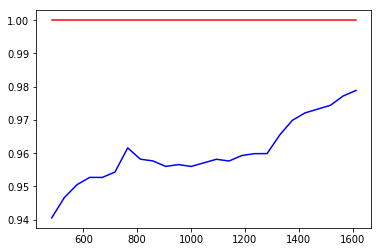

In [685]:
best = clf.best_estimator_
train_sizes, train_score, valid_scores = learning_curve(best, x, y, train_sizes=np.linspace(0.3, 1, 25), cv=10)
plt.plot(train_sizes, np.mean(train_score,1), 'r')
plt.plot(train_sizes, np.mean(valid_scores,1), 'b')


Logistic Regression model for digit recognition

In [686]:
model = LogisticRegression()
params = [{'penalty': ['l1', 'l2'], 'C':[1,2,3,4,5]}]
clf = GridSearchCV(model, params, cv=10 )
clf.fit(x,y)
print(clf.best_score_, clf.best_params_)

0.9309961046188091 {'C': 1, 'penalty': 'l2'}


Choosing the best model and plotting training(red curve) vs valifdation curve(blue curve) for Logistic Regression

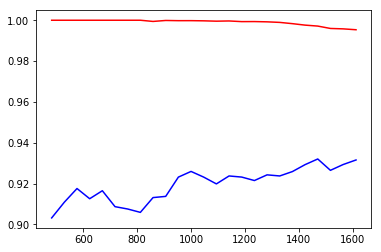

In [687]:
best = clf.best_estimator_
train_sizes, train_score, valid_scores = learning_curve(best, x, y, train_sizes=np.linspace(0.3, 1, 25), cv=10)
plt.plot(train_sizes, np.mean(train_score, 1), 'r')
plt.plot(train_sizes, np.mean(valid_scores, 1), 'b')


Linear Regression model for digit recognition

In [689]:
model = LinearRegression()
params = [{'fit_intercept': [True, False]}]
clf = GridSearchCV(model, params, cv=10 )
clf.fit(x,y)
print(clf.best_score_, clf.best_params_)

0.534550520436702 {'fit_intercept': True}


Choosing the best model and plotting training(red curve) vs valifdation curve(blue curve) for Linear Regression

(0, 1)

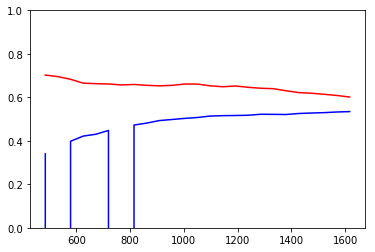

In [711]:
best = clf.best_estimator_
train_sizes, train_score, valid_scores = learning_curve(best, x, y, train_sizes=np.linspace(0.3, 1, 25), cv=10)
plt.plot(train_sizes, np.mean(train_score, 1), 'r')
plt.plot(train_sizes, np.mean(valid_scores, 1), 'b')
plt.ylim(0,1)

Variance, bias and noize should be low to prevent overfitting and tradeoff. It means that error, moize and sensitivity should be low. Simple algorithms(functions) cannot always properly fit the data. Therefore, these parameters grows for not linearly distributed data. To decrease the values of above parameters, it is used more difficult algorithms(such as SVM) and different(tuned) hyperparameters. Furthermore, it was used GridSearchCV to mix the hyperparameters for finding the best fit and accuracy.
Polynomial kernel SVM showed the highest accuracy score among used model with accuracy of almost 98%

Linear Regression tenfold cross validation

In [49]:
def LinearRegr(input, output):
    input = np.insert(input, 0, 1, axis=1)
    if np.linalg.det(np.transpose(input).dot(input)) != 0:
        x = np.linalg.inv(np.transpose(input).dot(input))
    else: 
        x = np.linalg.pinv(np.transpose(input).dot(input))
    xPseudo = x.dot(np.transpose(input))
    w = xPseudo.dot(output)
    return w

In [50]:
def Etest(input, output, w):
    error = 0
    lineSigns = np.sign(np.dot(input, w[1:]) + w[0])
    for i in range(input.shape[0]):
        if  lineSigns[i] != output[i]:
            error+=1
    return error

In [51]:
def E_value(input_train, output_train, input_test, output_test):
    error_value = np.zeros(10)

    for i in range(10):
        in_output_train = np.zeros(output_train.shape[0])
        in_output_test = np.zeros(output_test.shape[0])
        for j in range(in_output_train.shape[0]):
            if output_train[j] == i:
                in_output_train[j] = 1
            else:
                in_output_train[j] = -1
        for t in range(in_output_test.shape[0]):
            if output_test[t] == i:
                in_output_test[t] = 1
            else:
                in_output_test[t] = -1        
        model = LinearRegr(input_train, in_output_train)
        error_value[i] = Etest(input_test, in_output_test, model)
        
    return error_value
    

In [52]:
def average_error(n):
    e_value = np.zeros(10);
    m = int(digits.data.shape[0]/n)
    for l in range(n):
        s = l*m
        e_value = e_value + E_value(np.concatenate((digits.data[0:s],digits.data[s+m:]), axis = 0), np.concatenate((digits.target[0:s],digits.target[s+m:]),axis = 0), digits.data[s:s+m], digits.target[s:s+m])/n
    return e_value
    

In [61]:
np.mean(average_error(5)), np.mean(average_error(10)), np.mean(average_error(20))

(9.919999999999998, 4.64, 2.045)

20 fold shows the best result

In [1]:
def LogisticRegr(input, output, nu, T):
    input = np.insert(input, 0, 1, axis=1)
    w = np.zeros(shape = (T, input.shape[1]))
    gt = np.zeros(shape = (T, input.shape[0]))
    for t in range(1, T):
        n = np.random.randint(1, input.shape[0])
        w[t] = w[t-1] + nu*(2*output[n]*input[n])/(1+np.exp(output[n]*(2*np.transpose(w[t-1])*input[n])))
        for j in range(input.shape[0]):
            gt[t][j] = np.sign(np.dot(w[t], input[j]))
    return w[T-1]

In [2]:
def E_value_log(input_train, output_train, input_test, output_test):
    error_value = np.zeros(10)

    for i in range(10):
        in_output_train = np.zeros(output_train.shape[0])
        in_output_test = np.zeros(output_test.shape[0])
        for j in range(in_output_train.shape[0]):
            if output_train[j] == i:
                in_output_train[j] = 1
            else:
                in_output_train[j] = -1
        for t in range(in_output_test.shape[0]):
            if output_test[t] == i:
                in_output_test[t] = 1
            else:
                in_output_test[t] = -1        
        model = LogisticRegr(input_train, in_output_train, 0.001, 2000)
        error_value[i] = Etest(input_test, in_output_test, model)
        
    return error_value

In [3]:
def average_error_log(n):
    e_value = np.zeros(10);
    m = int(digits.data.shape[0]/n)
    for l in range(n):
        s = l*m
        e_value = e_value + E_value_log(np.concatenate((digits.data[0:s],digits.data[s+m:]), axis = 0), np.concatenate((digits.target[0:s],digits.target[s+m:]),axis = 0), digits.data[s:s+m], digits.target[s:s+m])/n
    return e_value

In [ ]:
np.mean(average_error_log(5)), np.mean(average_error_log(10)), np.mean(average_error_log(20)), np.mean(average_error_log(1796))